# Fake News Detection:-


In [1]:
# For importing neccessary libraries:-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import KFold,cross_val_score

In [2]:
# For importing dataset:-
Fake=pd.read_csv("Fake.csv")
Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
# For importing True dataset also:-
true=pd.read_csv("True.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Exploratory Data Analysis (EDA):-

In [5]:
# For checking the shape of dataset:-
Fake.shape

(23481, 4)

In [7]:
# For checking the shape of True dataset:-
true.shape

(21417, 4)

In [8]:
# For creating a new column as Label for True/Fkse news as Fake = 0:-
Fake['Label'] = 0

In [9]:
# for checking that the column has been created :-
Fake.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [12]:
# For checking the datatype of dataset:-
Fake.dtypes

title      object
text       object
subject    object
date       object
Label       int64
dtype: object

In [13]:
# For checking the datatype of True dataset:-
true.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [14]:
# For checking the null values in the dataset:-
Fake.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [15]:
# For checking the null values in true dataset:-
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

As seen above, there are no null value present in both the dataset.

In [16]:
# For creating a new column named Label for True/fake news as True = 1:-
true['Label'] = 1

In [17]:
# For checking that the label column has been created :-
true.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [18]:
# For concating both datasets:-
data= [Fake,true]

In [19]:
News= pd.concat(data)
News

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [20]:
# For dropping the date column:-
News.drop('date', axis = 1, inplace = True)

In [21]:
# For checking the shape of dataset after above removal :-
News.shape

(44898, 4)

In [22]:
# For checking the subject column:-
News['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

Here, as observed there are 2 similar fields  Politics and PoliticsNews so we will combine it together

In [23]:
News['subject'] = News['subject'].replace('politics','politicsNews')

In [24]:
# For checking the value counts after combining:-
News['subject'].value_counts()

politicsNews       18113
worldnews          10145
News                9050
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [25]:
# For checking the statistical summary of dataset:-
News.describe()

,Label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [26]:
# For checking the info of dataset:-
News.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   Label    44898 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


# Visualisation Phase:-

<AxesSubplot:xlabel='count', ylabel='subject'>

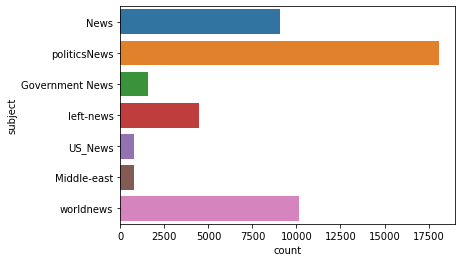

In [27]:
# For checking the visualisation using countplot:-
sns.countplot(y = News['subject'])

Here, as observed Political News are the most common news, Then World News.
US News & Middle-east news are the lowest news.

<AxesSubplot:xlabel='Label', ylabel='subject'>

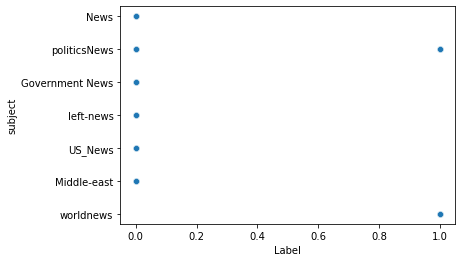

In [29]:
# For visualising with scatter plot:-
sns.scatterplot(y = News['subject'], x = News['Label'])

Here. as observed There are no fake news for World News and
Politics news can be True or it can be False.

# Data Preprocessing using NLP :-

In [30]:
# For converting text to lower case :-
News['title'] = News['title'].str.lower()
News['text'] = News['text'].str.lower()

In [31]:
stop_words = stopwords.words('english')

In [32]:
# For fetching original length:-
original_title = News['title'].str.len()
original_text = News['text'].str.len()

In [33]:
# For replacing email address as Email:- 
News['title'] = News['title'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email')
News['text'] = News['text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email')

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_22532\1480430058.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  News['title'] = News['title'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email')
C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_22532\1480430058.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  News['text'] = News['text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email')


In [34]:
# For replacing webiste link as website :-
News['title'] = News['title'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','website')
News['text'] = News['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','website')

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_22532\2451491877.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  News['title'] = News['title'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','website')
C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_22532\2451491877.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  News['text'] = News['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','website')


In [35]:
# For replacing phone No as phone number :-
News['title'] = News['title'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
News['text'] = News['text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_22532\2213392905.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  News['title'] = News['title'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_22532\2213392905.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  News['text'] = News['text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')


In [36]:
# For replacing currency as dollar :-
News['title'] = News['title'].str.replace(r'£|\$', 'dollers')
News['text'] = News['text'].str.replace(r'£|\$', 'dollers')

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_22532\3815773620.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  News['title'] = News['title'].str.replace(r'£|\$', 'dollers')
C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_22532\3815773620.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  News['text'] = News['text'].str.replace(r'£|\$', 'dollers')


In [37]:
# For replacing any no. as number :-
News['title'] = News['title'].str.replace(r'\d+(\.\d+)?', 'number')
News['text'] = News['text'].str.replace(r'\d+(\.\d+)?', 'number')

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_22532\616414591.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  News['title'] = News['title'].str.replace(r'\d+(\.\d+)?', 'number')
C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_22532\616414591.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  News['text'] = News['text'].str.replace(r'\d+(\.\d+)?', 'number')


In [38]:
# For dealing with punctuation:-
News['title'] = News['title'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))
News['text'] = News['text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

In [39]:
# For removing the stopwords:-
News['title'] = News['title'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
News['text'] = News['text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [40]:
# For applying Lemmatization:-
lem = WordNetLemmatizer()

In [41]:
News['title'] = News['title'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))
News['text'] = News['text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [42]:
# For fetching cleaned length :-
cleaned_title = News['title'].str.len()
cleaned_text = News['text'].str.len()

In [43]:
print('Original title length : ',original_title.sum())
print('cleaned title length : ',cleaned_title.sum())

Original title length :  3596856
cleaned title length :  3059254


In [44]:
# For fetching cleaned text length :-
print('Original text length : ',original_text.sum())
print('cleaned text length : ',cleaned_text.sum())

Original text length :  110858087
cleaned text length :  78875097


# Word Cloud:-

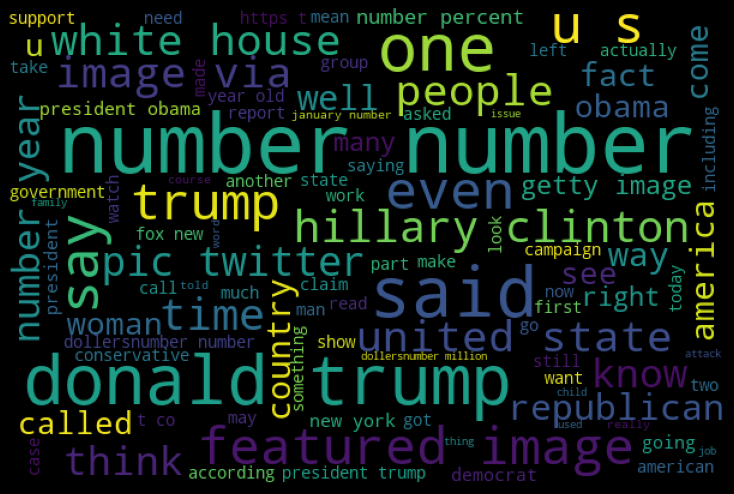

In [45]:
Hams = News['text'][News['Label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=100).generate(' '.join(Hams))
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

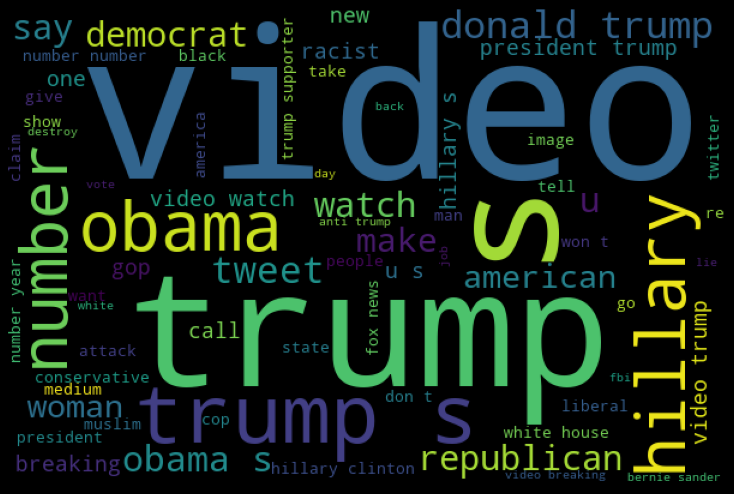

In [48]:
Hams = News['title'][News['Label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=70).generate(' '.join(Hams))
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [49]:
# So now fetch the Final dataset:=--
News

,title,text,subject,Label
0,donald trump sends embarrassing new year’s eve...,donald trump wish american happy new year leav...,News,0
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,0
2,sheriff david clarke becomes internet joke thr...,"friday, revealed former milwaukee sheriff davi...",News,0
3,trump obsessed even obama’s name coded website...,"christmas day, donald trump announced would ba...",News,0
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,News,0
...,...,...,...,...
21412,'fully committed' nato back new u.s. approach ...,brussels (reuters) nato ally tuesday welcomed ...,worldnews,1
21413,lexisnexis withdrew two product chinese market,"london (reuters) lexisnexis, provider legal, r...",worldnews,1
21414,minsk cultural hub becomes authority,minsk (reuters) shadow disused soviet-era fact...,worldnews,1
21415,vatican upbeat possibility pope francis visiti...,moscow (reuters) vatican secretary state cardi...,worldnews,1


# Encoding Techniques:-

In [50]:
lb = LabelEncoder()

In [51]:
News['subject'] = lb.fit_transform(News['subject'])

Tf-IDF VECTORISATION :-

In [53]:
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(News['text'])
x = features

In [54]:
# For defining value to y :-
y = News.Label

# Model Building :-

In [55]:
# For splitting the text:-
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 90)

In [56]:
def score(classi, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = classi.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = classi.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))
        print('\n ----- Roc Curve ----- \n')
        plot_roc_curve(classi, x_test, y_test)

In [57]:
# For defining different models :-
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()


 ----- Train Result ----- 

Accuracy Score: 0.9958423662875301

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     17634
           1       0.99      1.00      1.00     16039

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673


 ----- Confusion matrix ----- 
 [[17537    97]
 [   43 15996]]

 ----- Test Result ----- 

Accuracy Score: 0.9941202672605791

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5847
           1       0.99      1.00      0.99      5378

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225


 ----- Confusion matrix ----- 
 [[5804   43]
 [  23 5355]]

 ----- Roc Curve -

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


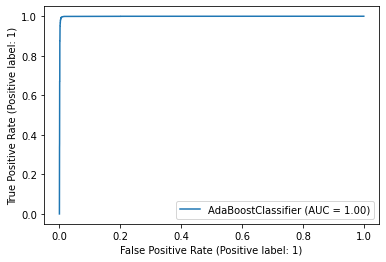

In [58]:
# For checking with AdaBoost Claa=ssifier :-
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9969114720993081

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17634
           1       1.00      1.00      1.00     16039

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673


 ----- Confusion matrix ----- 
 [[17556    78]
 [   26 16013]]

 ----- Test Result ----- 

Accuracy Score: 0.9948329621380846

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5847
           1       0.99      1.00      0.99      5378

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225


 ----- Confusion matrix ----- 
 [[5812   35]
 [  23 5355]]

 ----- Roc Curve -

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


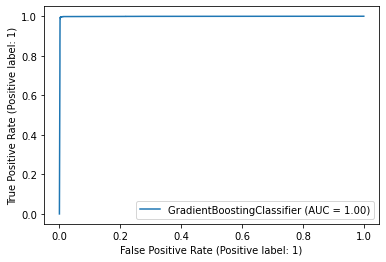

In [59]:
# For checking with GradientBoost Classifier:-
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9999703026163395

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17634
           1       1.00      1.00      1.00     16039

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673


 ----- Confusion matrix ----- 
 [[17634     0]
 [    1 16038]]

 ----- Test Result ----- 

Accuracy Score: 0.9966146993318485

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5847
           1       1.00      1.00      1.00      5378

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225


 ----- Confusion matrix ----- 
 [[5825   22]
 [  16 5362]]

 ----- Roc Curve -

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


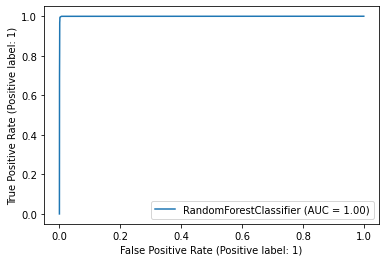

In [60]:
# For checking accuracy score with RandomForest classifier :-
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9999703026163395

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17634
           1       1.00      1.00      1.00     16039

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673


 ----- Confusion matrix ----- 
 [[17634     0]
 [    1 16038]]

 ----- Test Result ----- 

Accuracy Score: 0.9951893095768374

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5847
           1       1.00      0.99      0.99      5378

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225


 ----- Confusion matrix ----- 
 [[5830   17]
 [  37 5341]]

 ----- Roc Curve -

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


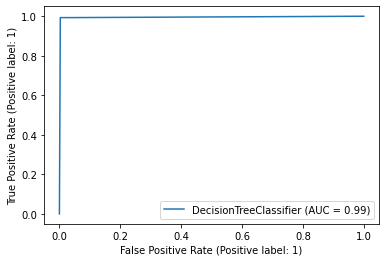

In [62]:
# For checking accuracy score with DecisionTree classifier :-
dt.fit(x_train,y_train)
score(dt, x_train,x_test,y_train,y_test,train = True)
score(dt, x_train,x_test,y_train,y_test,train = False)

Here, as seen above we are proceeding with RandomForestClassifier as Best Model as it is giving best accuracy levels.

In [65]:
# For comparing Actual Vs Predicted :-
A_RF = np.array(y_test)
predicted_RF = np.array(rf.predict(x_test))
data_rf = pd.DataFrame({'Original':A_RF,'Predicted':predicted_RF})
data_rf

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
11220,0,0
11221,1,1
11222,1,1
11223,0,0


Here, as seen above the model predictions are right as actual and predicted values are showing similar.

# Cross Validation:-

In [66]:
K_F = KFold(n_splits = 3,shuffle = True)
K_F

KFold(n_splits=3, random_state=None, shuffle=True)

In [67]:
# For fetching cv score :-
cross_val_score(rf,x,y,cv = 5).mean()

0.9958349611106936

# Saving Model:-

In [68]:
# For importing libraries for saving model:- 
import pickle
Name="FakeNewsDetect.pkl"
pickle.dump(rf,open(Name,'wb'))

# Loading Model :-

In [69]:
# For loading model:-
Models=pickle.load(open(Name,'rb'))

In [70]:
# For displaying predictions:-
prediction=Models.predict(x_test)
prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [71]:
pd.DataFrame([Models.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,11215,11216,11217,11218,11219,11220,11221,11222,11223,11224
Predicted,0,0,0,1,0,1,1,1,1,0,...,0,0,0,1,1,0,1,1,0,0
Actual,0,0,0,1,0,1,1,1,1,0,...,0,0,0,1,1,0,1,1,0,0
